In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import missingno as mn
import seaborn as sns

In [144]:
df=pd.read_csv("test.csv")
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


In [145]:
df.shape

(3534, 9)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   int64  
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 248.6+ KB


In [147]:
df.isna().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

<Axes: >

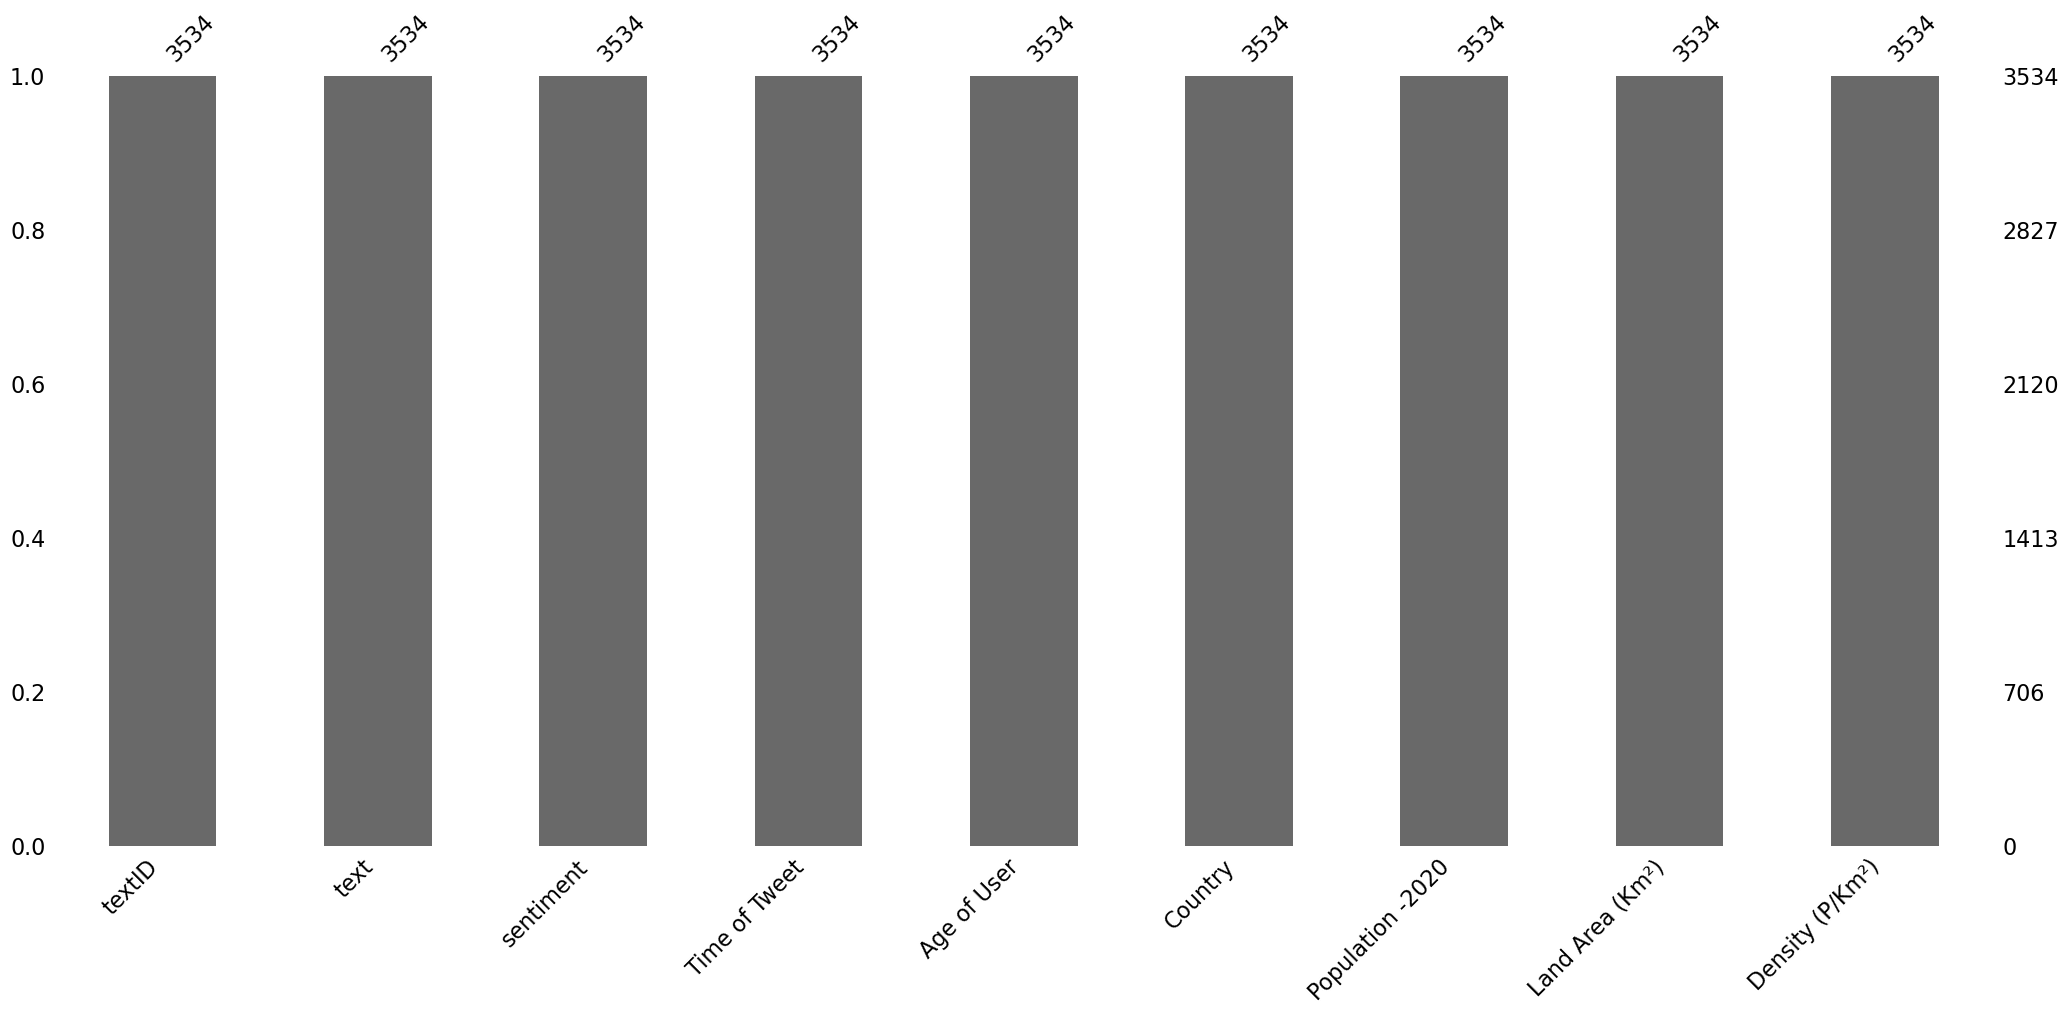

In [148]:
mn.bar(df)

Age of User
0-20      590
21-30     590
31-45     590
46-60     588
60-70     588
70-100    588
Name: count, dtype: int64


<Axes: xlabel='Age of User'>

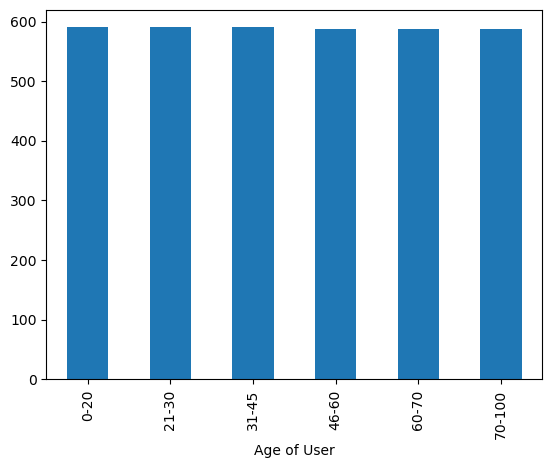

In [149]:
age = df['Age of User'].value_counts(ascending=False)  # Let's look at the number of tweets by age
print(age)
age.plot.bar()

In [150]:
x=df.sentiment.value_counts().index
x

Index(['neutral', 'positive', 'negative'], dtype='object', name='sentiment')

In [151]:
y=df.sentiment.value_counts().count
y

<bound method Series.count of sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64>

In [152]:
df.sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

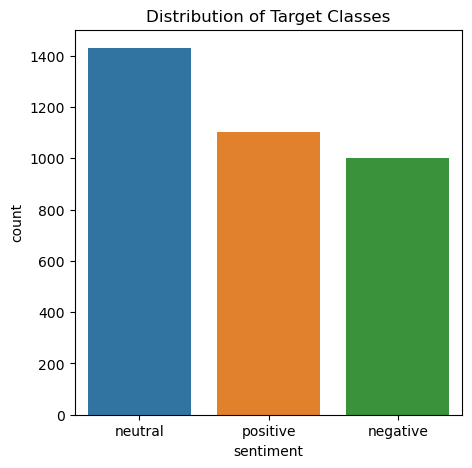

In [153]:
plt.figure(figsize=(5,5))
sns.countplot(x="sentiment",data=df)
plt.title('Distribution of Target Classes')
plt.xlabel("sentiment")
plt.ylabel("count")
plt.show()

In [154]:
df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [155]:
target=df.sentiment
target.head()

0     neutral
1    positive
2    negative
3    positive
4    positive
Name: sentiment, dtype: object

In [156]:
text_array=pd.get_dummies(df.text,columns=['text'])
feature=text_array
feature

,- brief interruption- brb. goodnight if i don`t catch u again later. gotta ck something,GRR! my stupid meebo is disconnecting me every 5 seconds,"I am sending healthy, healing thoughts in the mumborg`s direction.",eeek!! Your coming!!!! Im soo excited to see you on Thursday!!,"Awww, that wasn`t very nice.",Bummer. I hope it doesn`t continue too long.,But is right: This is like the Cape Breton coal mines but ++. No lessons learned.,But he`s so adorable.,Caladesi was definitely a nice peaceful way to spend a Sunday! I got a lil tan!,I love you,...,"yay playing scattegories and being random with Joel, May & Sherman",yay that was good umm reggie perrin next.. oh who cares no1`s watching bbc1 lol,yeaaaah tangerang in vacation,yeah so Prom Night is now the Craft (good movie),"yep, good morning to you all or night or evening or whatever xD",you can see the coffee table again!! ...so when r u cominging over 2 insult me into cleaning the rest of the house?,"you tell yo mamma an em i axe how she durrin, and that i said happy mothers day.",you`ve got to read it downwards for it to make sense.,"yup, def swine flu. I think it was the sausage.",Ã¯Â¿Â½Ã¯Â¿Â½We are ready for the new generation!!...Oh yeah...We are a Backstreet fans and we are proud about it!!
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3530,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3531,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size=0.5, random_state=42)

In [162]:
kernel=['linear','poly','rbf']
C=[1,5,10,15,20]
avg_score={}

for kval in kernel:
    for cval in C:
     result=cross_val_score(SVC(kernel=kval,C=cval,gamma='auto'),feature,target,cv=4)
     avg_score[kval + '_' + str(cval)]=np.average(result)
avg_score

{'linear_1': 0.4046404431621939,
 'linear_5': 0.4046404431621939,
 'linear_10': 0.4046404431621939,
 'linear_15': 0.4046404431621939,
 'linear_20': 0.4046404431621939,
 'poly_1': 0.4046404431621939,
 'poly_5': 0.4046404431621939,
 'poly_10': 0.4046404431621939,
 'poly_15': 0.4046404431621939,
 'poly_20': 0.4046404431621939,
 'rbf_1': 0.4046404431621939,
 'rbf_5': 0.4046404431621939,
 'rbf_10': 0.4046404431621939,
 'rbf_15': 0.4046404431621939,
 'rbf_20': 0.4046404431621939}

In [165]:
criterion=['gini', 'entropy', 'log_loss']
ccp_alpha=[0.1,0.3,0.4,0.5]
avg_score={}

for kval in criterion:
    for cval in ccp_alpha:
     result=cross_val_score(RandomForestClassifier(criterion=kval,ccp_alpha=cval),feature,target,cv=4)
     avg_score[kval + '_' + str(cval)]=np.average(result)
avg_score

{'gini_0.1': 0.4046404431621939,
 'gini_0.3': 0.4046404431621939,
 'gini_0.4': 0.4046404431621939,
 'gini_0.5': 0.4046404431621939,
 'entropy_0.1': 0.4046404431621939,
 'entropy_0.3': 0.4046404431621939,
 'entropy_0.4': 0.4046404431621939,
 'entropy_0.5': 0.4046404431621939,
 'log_loss_0.1': 0.4046404431621939,
 'log_loss_0.3': 0.4046404431621939,
 'log_loss_0.4': 0.4046404431621939,
 'log_loss_0.5': 0.4046404431621939}

In [178]:
criterion=['friedman_mse', 'squared_error']
learning_rate=[0.1,0.3,0.4,0.5]
avg_score={}

for kval in criterion:
    for cval in learning_rate:
     result=cross_val_score(GradientBoostingClassifier(criterion=kval,learning_rate=cval,loss='log_loss', n_estimators=100),feature,target,cv=4)
     avg_score[kval + '_' + str(cval)]=np.average(result)
avg_score

{'friedman_mse_0.1': 0.4046404431621939,
 'friedman_mse_0.3': 0.4046404431621939,
 'friedman_mse_0.4': 0.4046404431621939,
 'friedman_mse_0.5': 0.4046404431621939,
 'squared_error_0.1': 0.4046404431621939,
 'squared_error_0.3': 0.4046404431621939,
 'squared_error_0.4': 0.4046404431621939,
 'squared_error_0.5': 0.4046404431621939}

In [177]:
model1=MultinomialNB(alpha=1,force_alpha=True)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.4074702886247878

In [196]:
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4074702886247878

In [213]:
dir(metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fb

In [232]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

0.4074702886247878
[[  0 484   0]
 [  0 720   0]
 [  0 563   0]]


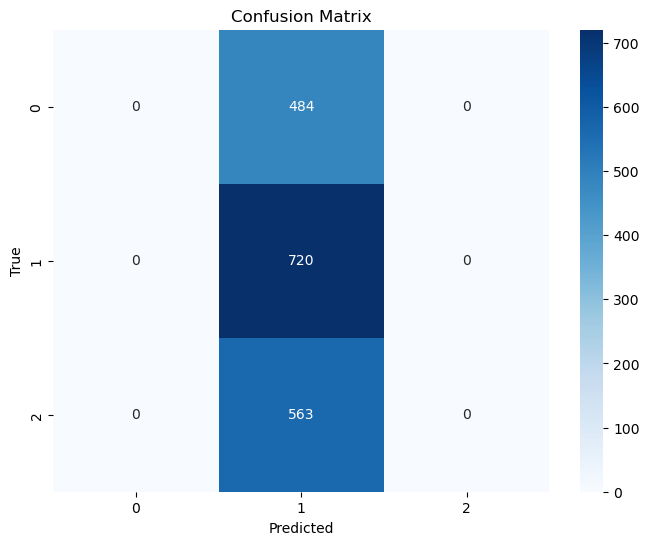

In [226]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()